In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
matplotlib.style.use('ggplot')
%matplotlib inline
from sklearn.model_selection import cross_val_score

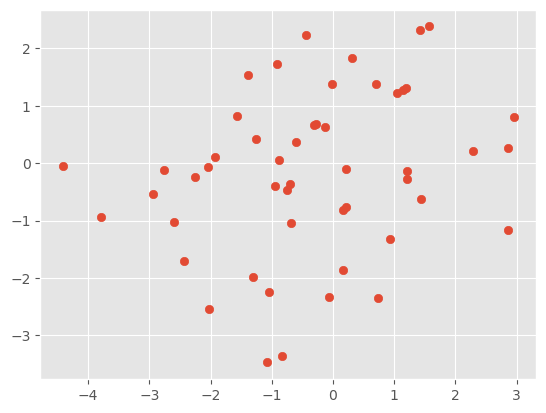

In [2]:
from sklearn.decomposition import PCA

mu = np.zeros(2)
C = np.array([[3,1],[1,2]])

data = np.random.multivariate_normal(mu, C, size=50)
plt.scatter(data[:,0], data[:,1])
plt.show()

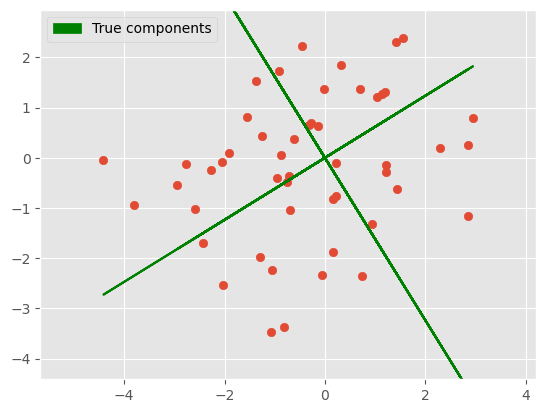

In [3]:
v, W_true = np.linalg.eig(C)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
g_patch = mpatches.Patch(color='g', label='True components')
plt.legend(handles=[g_patch])
plt.axis('equal')
limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1])),
          np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))]
plt.xlim(limits[0],limits[1])
plt.ylim(limits[0],limits[1])
plt.draw()

In [4]:
x_test_np = np.asarray([1,2,3,4])
y_test_np = np.asarray([1,4,9,16])

In [5]:
def plot_principal_components(data, model, scatter=True, legend=True):
    W_pca = model.components_
    if scatter:
        plt.scatter(data[:,0], data[:,1])
    plt.plot(data[:,0], -(W_pca[0,0]/W_pca[0,1])*data[:,0], color="c")
    plt.plot(data[:,0], -(W_pca[1,0]/W_pca[1,1])*data[:,0], color="c")
    if legend:
        c_patch = mpatches.Patch(color='c', label='Principal components')
        plt.legend(handles=[c_patch], loc='lower right')
    # сделаем графики красивыми:
    plt.axis('equal')
    limits = [np.minimum(np.amin(data[:,0]), np.amin(data[:,1]))-0.5,
              np.maximum(np.amax(data[:,0]), np.amax(data[:,1]))+0.5]
    plt.xlim(limits[0],limits[1])
    plt.ylim(limits[0],limits[1])
    plt.draw()

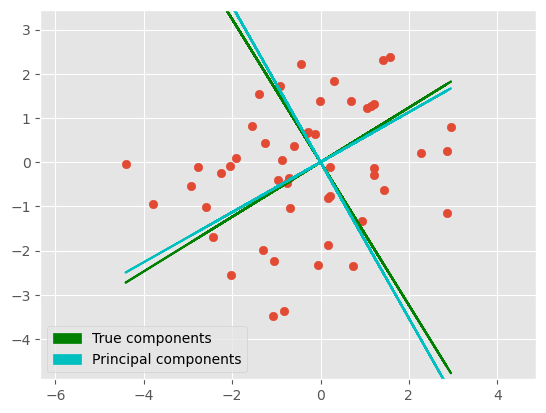

In [6]:
model = PCA(n_components=2)
model.fit(data)

plt.scatter(data[:,0], data[:,1])
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data[:,0], (W_true[0,0]/W_true[0,1])*data[:,0], color="g")
plt.plot(data[:,0], (W_true[1,0]/W_true[1,1])*data[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

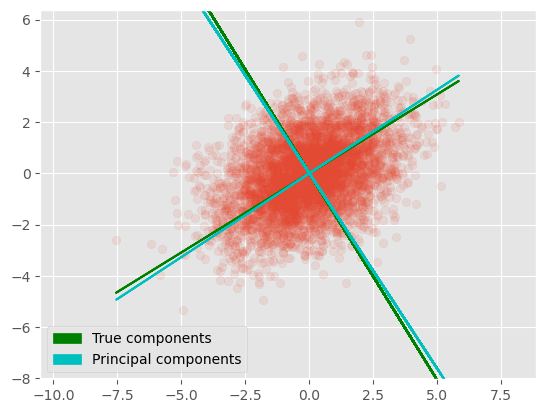

In [7]:
data_large = np.random.multivariate_normal(mu, C, size=5000)

model = PCA(n_components=2)
model.fit(data_large)
plt.scatter(data_large[:,0], data_large[:,1], alpha=0.1)
# построим истинные компоненты, вдоль которых максимальна дисперсия данных
plt.plot(data_large[:,0], (W_true[0,0]/W_true[0,1])*data_large[:,0], color="g")
plt.plot(data_large[:,0], (W_true[1,0]/W_true[1,1])*data_large[:,0], color="g")
# построим компоненты, полученные с использованием метода PCA:
plot_principal_components(data_large, model, scatter=False, legend=False)
c_patch = mpatches.Patch(color='c', label='Principal components')
plt.legend(handles=[g_patch, c_patch])
plt.draw()

In [8]:
data

array([[-1.38168334,  1.53201927],
       [-1.91941499,  0.10516272],
       [ 2.85115462, -1.16008207],
       [-0.12788709,  0.63562087],
       [-1.30166676, -1.98632836],
       [-0.31249821,  0.662475  ],
       [ 0.16611216, -1.87060097],
       [-3.79633229, -0.93833915],
       [-4.41351897, -0.04597669],
       [-0.00831683,  1.37726823],
       [-2.93811689, -0.53374679],
       [-1.56139503,  0.81787726],
       [-2.76253786, -0.11745563],
       [-2.26059747, -0.23647088],
       [-2.02548357, -2.54339845],
       [-0.60943166,  0.36978304],
       [-1.2545143 ,  0.42440909],
       [ 1.19920207,  1.305827  ],
       [-0.44789709,  2.2314964 ],
       [-0.92235482,  1.72256175],
       [-0.75902079, -0.47479129],
       [ 0.74304731, -2.34751396],
       [ 0.70089146,  1.37677288],
       [ 1.14072979,  1.27214849],
       [ 1.41830932,  2.31303658],
       [ 0.21990691, -0.0984697 ],
       [ 1.21585183, -0.28271277],
       [ 2.8546236 ,  0.26071125],
       [ 1.04723268,

In [9]:
exemple_1_data = pd.read_csv('main_component_1.csv')

In [10]:
test_model = PCA(n_components=10)

In [11]:
scores = cross_val_score(test_model, exemple_1_data,cv = 3)

In [12]:
scores.mean()

-121.79993517230082

In [13]:
num_component_scores = np.empty((exemple_1_data.shape[1],2))

In [14]:
num_component_scores[0,1]

9.799109973883e-312

In [15]:
for i in range(exemple_1_data.shape[1]):
    model = PCA(n_components=i+1)
    num_component_scores[i,0] = i+1
    num_component_scores[i,1] = cross_val_score(model, exemple_1_data,cv = 3).mean()

In [16]:
num_component_scores_sort = num_component_scores[num_component_scores[:,1].argsort()[::-1]]

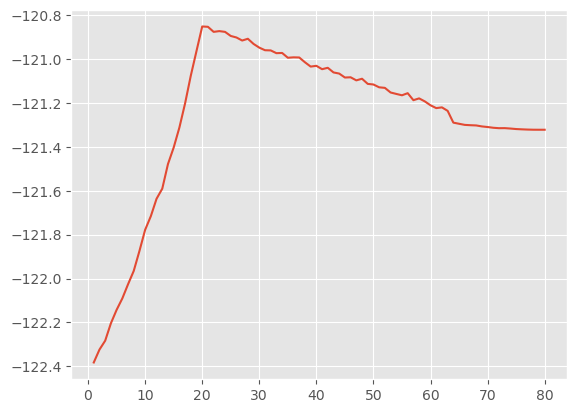

In [17]:
plt.plot(num_component_scores[:,0],num_component_scores[:,1])

In [18]:
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score as cv_score

def plot_variances(d_variances):
    n_components = np.arange(1,d_variances.size+1)
    plt.plot(n_components, d_variances, 'b', label='Component variances')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('variance')
    plt.legend(loc='upper right')
    plt.show()
    
def write_answer_2(optimal_d):
    print(optimal_d)
    with open("pca_answer2.txt", "w") as fout:
        fout.write(str(optimal_d))
        
data = pd.read_csv('main_component_2.csv')

In [19]:
model = PCA().fit(data)

In [20]:
data_transform = model.transform(data)

In [21]:
means = np.mean(data_transform,axis=0)

In [22]:
dispersions = np.sum((data_transform-means)**2,axis=0)/(data_transform.shape[0])

In [23]:
dispersions_np = dispersions

In [24]:
mask = dispersions_np.argsort()[::-1]

In [25]:
dispersions_np_sort = dispersions_np[mask]

In [26]:
difference = np.zeros(dispersions_np_sort.shape[0])

In [27]:
for i in range(dispersions_np_sort.shape[0] - 1):
    difference[i] = dispersions_np_sort[i] - dispersions_np_sort[i+1]

In [28]:
difference.argmax()

29

In [29]:
mask

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

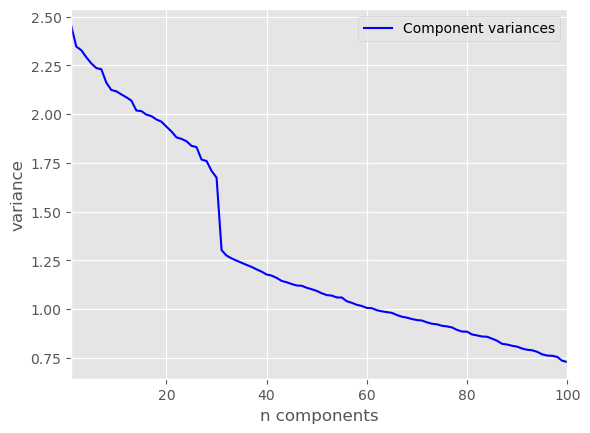

In [30]:
plot_variances(dispersions_np_sort)

In [31]:

from sklearn import datasets

def plot_iris(transformed_data, target, target_names):
    plt.figure()
    for c, i, target_name in zip("rgb", [0, 1, 2], target_names):
        plt.scatter(transformed_data[target == i, 0],
                    transformed_data[target == i, 1], c=c, label=target_name)
    plt.legend()
    plt.show()
    
def write_answer_3(list_pc1, list_pc2):
    print(list_pc1)
    print(list_pc2)
    with open("pca_answer3.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc1]))
        fout.write(" ")
        fout.write(" ".join([str(num) for num in list_pc2]))

# загрузим датасет iris
iris = datasets.load_iris()
data = iris.data
target = iris.target
target_names = iris.target_names

In [32]:
model = PCA(n_components=2).fit(data)

In [33]:
data_transform = model.transform(data)

In [34]:
data_mean = np.mean(data ,axis = 0)

In [35]:
data_transform_mean = np.mean(data_transform ,axis = 0)

In [36]:
data_centering = data - data_mean

In [37]:
data_transform_centering = data_transform - data_transform_mean

In [38]:
correlations = np.empty((data_transform.shape[1],data.shape[1]))

In [39]:
for i in range(data_transform.shape[1]):
    correlations[i] = np.sum((data_centering.T*data_transform_centering[:,i]).T,axis = 0)/(np.sqrt(np.sum(data_centering**2,axis=0)*np.sum(data_transform_centering**2)))
    

In [40]:
correlations

array([[ 0.87270756, -0.38777593,  0.970415  ,  0.9399506 ],
       [ 0.09100134,  0.19225824, -0.0112715 , -0.01136493]])

In [41]:
max_ind = np.empty(correlations.shape[1])

In [42]:
for i in range(correlations.shape[1]):
    max_ind[i] = np.argmax(correlations[:,i])

In [43]:
max_ind

array([0., 1., 0., 0.])

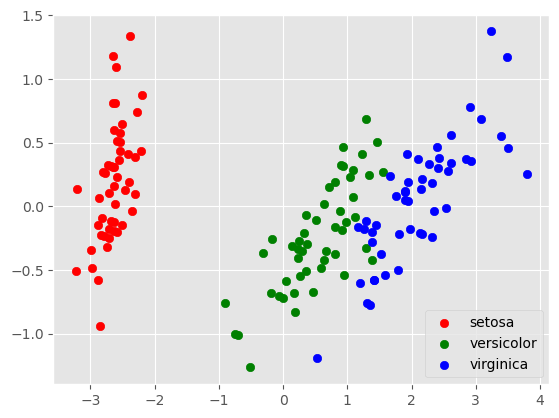

In [44]:
plot_iris(data_transform, target, target_names)

In [110]:
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA

def write_answer_4(list_pc):
    with open("pca_answer4.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in list_pc]))

In [111]:
data = fetch_olivetti_faces(shuffle=True, random_state=0).data
model = PCA(n_components=10, svd_solver='randomized').fit(data)

In [112]:
data_transform = model.transform(data)

In [126]:
data_transform.mean()

4.386902e-08

In [138]:
data_transform

array([[ 0.8157952 , -4.1440325 ,  2.483267  , ..., -2.1643767 ,
         0.25074533, -0.60334224],
       [ 3.8633647 , -1.3345785 , -5.423966  , ..., -0.40779728,
        -1.0710064 ,  0.48615986],
       [ 4.869934  , -0.5586588 , -0.884193  , ...,  1.2692178 ,
         2.128721  , -1.6200461 ],
       ...,
       [-2.0034714 , -1.8449436 ,  5.754595  , ..., -0.65293634,
        -1.5429885 ,  1.4851291 ],
       [-1.9705238 ,  3.378717  ,  2.0699775 , ..., -0.71806026,
         0.8150679 ,  1.0075221 ],
       [-4.1052337 ,  1.9917212 , -0.05972096, ..., -0.93103933,
         0.6822002 , -1.2651083 ]], dtype=float32)

In [114]:
data_transform_means = np.mean(data_transform,axis = 0)

In [128]:
data_transform_means

array([-5.60283659e-08, -1.20401381e-07, -5.39347525e-07,  2.43186946e-07,
        1.88574191e-07, -1.06990335e-07,  5.07608036e-07,  1.23083595e-07,
        5.69224348e-08,  1.28746038e-07], dtype=float32)

In [129]:
dividers = np.sum((data_transform)**2,axis = 1)

In [130]:
disperrtions = ((((data_transform)**2).T)/dividers).T

In [131]:
disperrtions.shape

(400, 10)

In [132]:
images = fetch_olivetti_faces(shuffle=True, random_state=0).images

In [133]:
max_ind = np.empty(10)

In [134]:
for i in range(10):
    max_ind[i] = ((disperrtions.T)[i,:]).argmax()

In [135]:
max_ind

array([197.,  18.,  66., 319., 363., 131., 142., 382., 353., 140.])

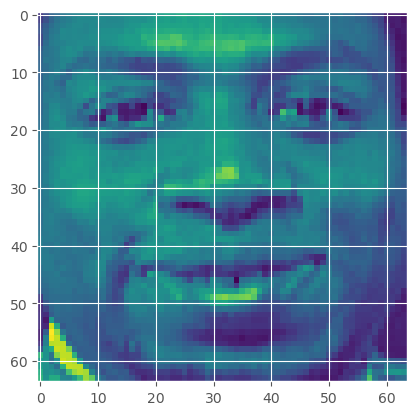

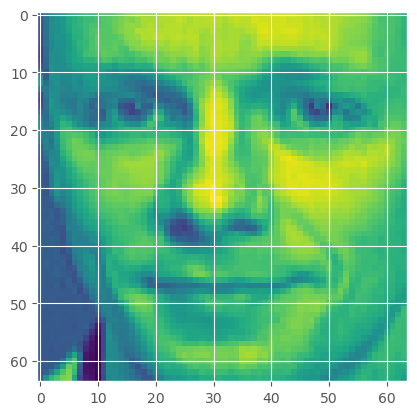

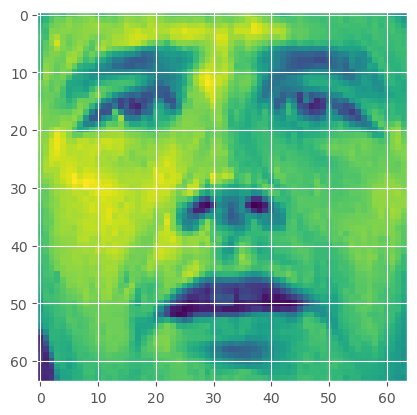

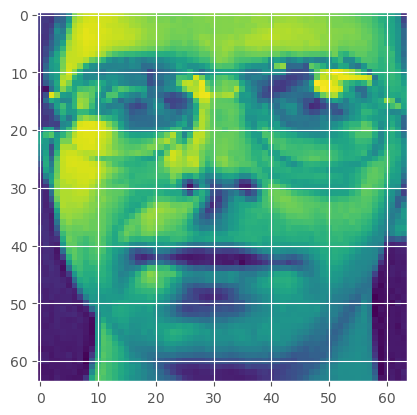

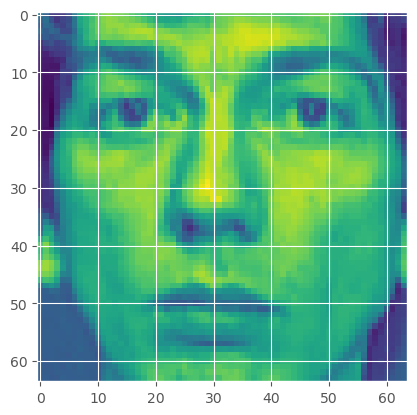

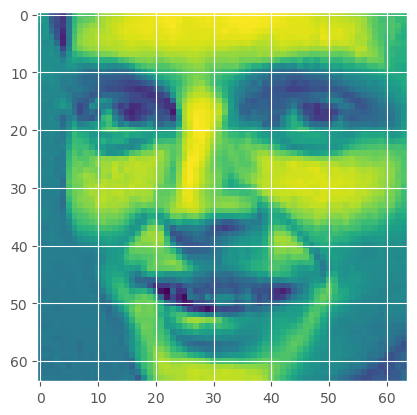

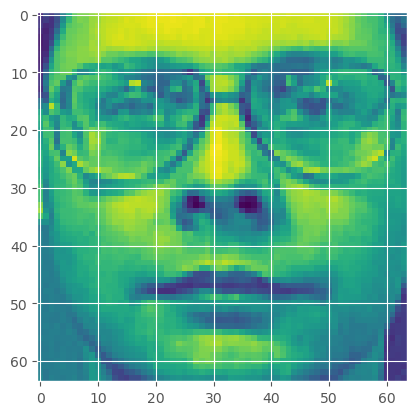

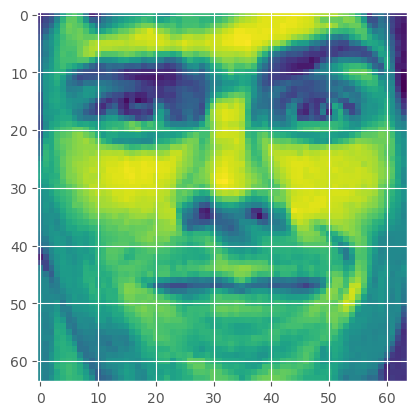

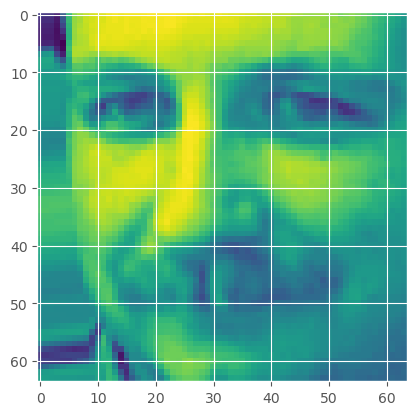

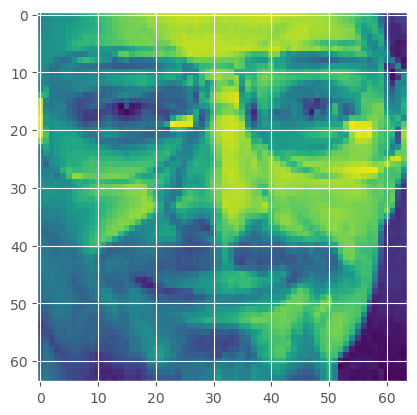

In [136]:
for i in max_ind:
    plt.imshow(images[int(i)])
    plt.show()

In [123]:
int(i)

140